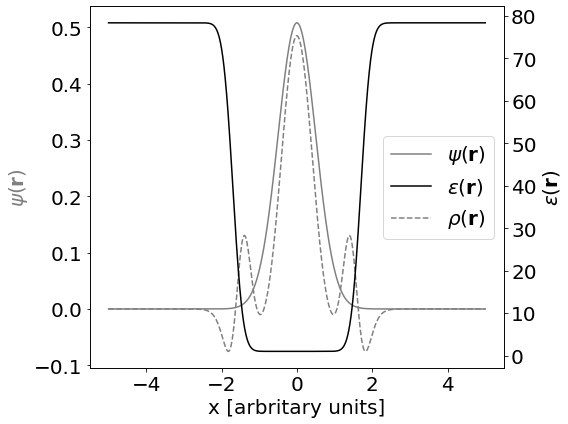

In [15]:
"""
Program to validate the iterative method, 
using a constructed electrostatic potential to obtain input charge densities
"""

import numpy as np
#from mpi4py import MPI
#import pmesh.pm as pmesh
import matplotlib.pyplot as plt
from scipy import special

### Setting up the potential ###
def psi_analytic(x,y,z,mu_x,mu_y,mu_z):
    sigma = 0.5
    d = 3
    denom = ((sigma**d) * (np.sqrt(2 * np.pi)**d))
    A = 1.0/denom
    return A * np.exp(-(1/(2 * sigma**2)) * ((x - mu_x)**2 + (y - mu_y)**2 \
            + (z - mu_z)**2)) # + (z - mu_z)**2))

x = np.linspace(-5,5,1000, dtype = float)
y = np.linspace(-5,5,1000, dtype = float)
z = np.linspace(-5,5,1000,dtype = float)
mu_x = mu_y = mu_z = 0.0

### Setting up the dielectric permittivity ###
def dielectric(x,y,z):
    eps_0 = 78.36; delta = 0.3; d0 = 1.7
    r = np.sqrt(x**2 + y**2 + z**2) # + z**2) #+ z**2)
    h = 1.0/2 * (1 + special.erf((r - d0)/delta))
    return 1 + (eps_0 - 1) * h

def densities_analytic(x,y,z,mu_x,mu_y,mu_z, eps = dielectric, f = psi_analytic):
    d = 3
    eps_0 = 78.36; delta = 0.3; d0 = 1.7
    r = np.sqrt(x**2 + y**2 + z**2)
    sigma = 0.5
    c = 1.0/np.sqrt(np.pi)*(eps_0 - 1)
    expr1 = eps(x,y,z)*(r**2/sigma**4 - 3.0/sigma**2)*f(x,y,z,mu_x,mu_y,mu_z)
    expr2 = r/(delta*sigma**2)*f(x,y,z,mu_x,mu_y,mu_z)*np.exp(-((r-d0)/delta)**2)
    return -1.0*(expr1 - c*expr2)


fs = 20
y = z = 0.0 # only along the x-axis (so that y and z held constant)
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (8,6))
l1 ,= ax.plot(x, psi_analytic(x,y,z,mu_x,mu_y,mu_z), color = "grey")
l3 ,= ax.plot(x,densities_analytic(x,y,z,mu_x,mu_y,mu_z)*(1/(4*np.pi)),"--" ,color = "grey")
ax.set_xlabel("x [arbritary units]",fontsize = fs)
ax.set_ylabel(r"$\psi(\mathbf{r})$", color = "grey", fontsize=fs)
ax2=ax.twinx()
l2 ,= ax2.plot(x,dielectric(x,y,z), color = "black")
ax2.set_ylabel(r"$\varepsilon(\mathbf{r})$", fontsize = fs)
plt.legend([l1, l2,l3],[ r"$\psi(\mathbf{r})$",r"$\varepsilon(\mathbf{r})$", \
                        r"$\rho(\mathbf{r})$"], loc = "center right", fontsize = fs)

ax.tick_params(axis='x', labelsize= fs); ax.tick_params(axis='y', labelsize= fs)
ax2.tick_params(axis='y', labelsize= fs)

plt.tight_layout()
plt.savefig("./figs/analytical case", format = "pdf")
plt.show()



Now looking at charge densities as 3D

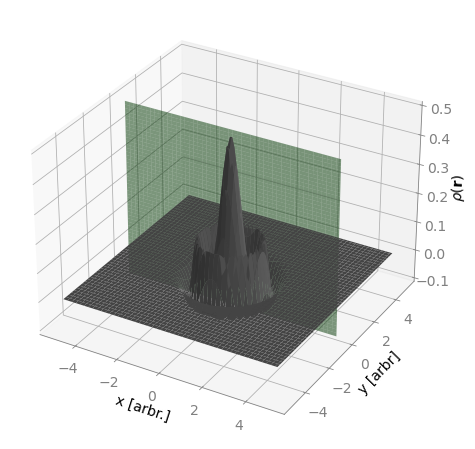

In [17]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

Xhat, Yhat = np.meshgrid(x,y, indexing = "ij")

x = np.linspace(-5,5,100, dtype = float)
y = np.linspace(-5,5,100, dtype = float)
z = np.linspace(-5,5,100,dtype = float)

N = 50
N_half = 50-1
x_surf,z_surf = np.meshgrid(np.linspace(-5,5,N), np.linspace(-0.1,0.5,N)) 
X_surf = x_surf.T
Z_surf = z_surf.T
Y_surf = 0 * np.ones((N, N))

X,Y,Z = np.meshgrid(x,y,z)
densities = densities_analytic(X,Y,Z,mu_x,mu_y,mu_z)*(1/(4*np.pi))
fs = 14 

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize = ((10,8)))
ax.plot_surface(Xhat, Yhat, densities[:,:,N_half], color = "grey") # densities for the x axis 
ax.plot_surface(X_surf, Y_surf, Z_surf, color = "green", alpha = 0.5)
ax.set_zlim([-0.1,0.5])
ax.set_xlabel("x [arbr.]", fontsize = fs)
ax.set_ylabel("y [arbr]", fontsize = fs)
ax.set_zlabel(r'$\rho(\mathbf{r})$', fontsize = fs)
ax.tick_params(axis='x', labelsize= fs); ax.tick_params(axis='y', labelsize= fs)
ax.tick_params(axis='z', labelsize= fs)


## chose colour of axis
ax.tick_params(axis='x',colors='grey')
ax.tick_params(axis='y',colors='grey')
ax.tick_params(axis='z',colors='grey')

ax.w_xaxis.line.set_color("grey")
ax.w_yaxis.line.set_color("grey")
ax.w_zaxis.line.set_color("grey")
plt.savefig("./figs/3D-analytical-validation", format = "pdf")
plt.show()